In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

## Helper Functions

In [51]:
# Plot multiple images
def plot_images(images, titles):
    
    # Determine dimensions for subplot array
    x = math.ceil(len(images)/2)
    y = 4
    
    # Iterate through each image
    for i in range(len(images)):
        fig = plt.subplot(x, y, i + 1)
        
        # Remove axes
        plt.axis("off")
        
        # Plot formatting
        plt.subplots_adjust(wspace=0.25, hspace=0.9, top=0.9)
        plt.title(titles[i])
        fig = plt.gcf()
        fig.set_size_inches(10,10)
        plt.imshow(images[i], cmap="grey")

## Project 1: Retrieving Image Properties

In [13]:
# Read images
lena_gray = cv2.imread("../data/hw4/lena_gray_512.tif")
lena_color = cv2.imread("../data/hw4/lena_color_512.tif")
# Convert lena_color to RGB colorspace since cv2 reads it as BGR, which is not accurate
lena_color = cv2.cvtColor(lena_color, cv2.COLOR_BGR2RGB)
# Collect and print values
print(f"* * * * * lena_gray * * * * *\nShape: {lena_gray.shape}\nSize: {lena_gray.size}\nData Type: {lena_gray.dtype}\n")
print(f"* * * * * lena_color * * * * *\nShape: {lena_color.shape}\nSize: {lena_color.size}\nData Type: {lena_color.dtype}")

* * * * * lena_gray * * * * *
Shape: (512, 512, 3)
Size: 786432
Data Type: uint8

* * * * * lena_color * * * * *
Shape: (512, 512, 3)
Size: 786432
Data Type: uint8


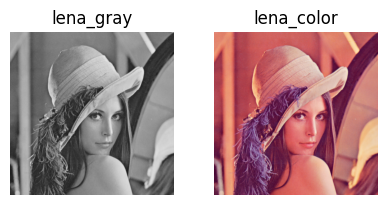

In [15]:
p1_images = [lena_gray, lena_color]
p1_titles = ["lena_gray", "lena_color"]
plot_images(p1_images, p1_titles)

## Project 2: Arithmetic Operations on Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


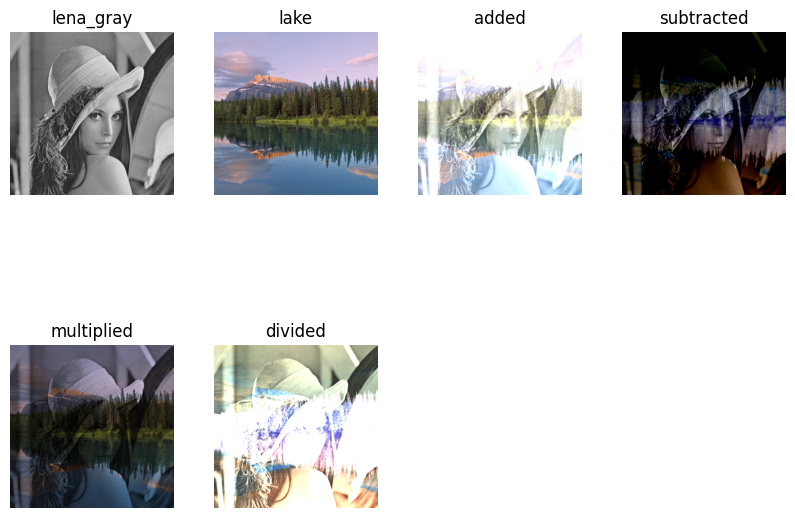

In [41]:
# Lake image is not in provided folder of images so a 512x512 png image of a lake was found online
lake = cv2.imread("../data/hw4/lake.png")
lake = cv2.cvtColor(lake, cv2.COLOR_BGR2RGB)

# Convert to floats for mult/div and normalize (/255)
lake_float = lake.astype(float)/255
lena_gray_float = lena_gray.astype(float)/255

# Arithmetic
added = cv2.add(lena_gray, lake)
subtracted = cv2.subtract(lena_gray, lake)
multiplied = cv2.multiply(lena_gray_float, lake_float)
divided = cv2.divide(lena_gray_float, lake_float)

# Plot results
p2_images = [lena_gray, lake, added, subtracted, multiplied, divided]
p2_titles = ["lena_gray", "lake", "added", "subtracted", "multiplied", "divided"]
plot_images(p2_images, p2_titles)

## Project 3: Blending Images

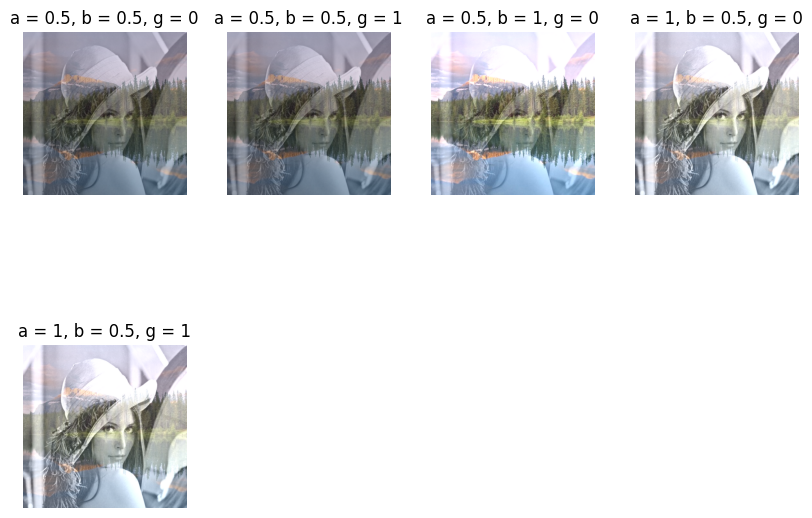

In [52]:
p3_images = []

# alpha = 0.5, beta = 0.5, gamma = 0
alpha = 0.5
beta = 0.5
gamma = 0
p3_images.append(cv2.addWeighted(lena_gray, alpha, lake, beta, gamma))

# alpha = 0.5, beta = 0.5, gamma = 1
alpha = 0.5
beta = 0.5
gamma = 1
p3_images.append(cv2.addWeighted(lena_gray, alpha, lake, beta, gamma))

# alpha = 0.5, beta = 1, gamma = 0
alpha = 0.5
beta = 1
gamma = 0
p3_images.append(cv2.addWeighted(lena_gray, alpha, lake, beta, gamma))

# alpha = 1, beta = 0.5, gamma = 0
alpha = 1
beta = 0.5
gamma = 0
p3_images.append(cv2.addWeighted(lena_gray, alpha, lake, beta, gamma))

# alpha = 1, beta = 0.5, gamma = 1
alpha = 1
beta = 0.5
gamma = 1
p3_images.append(cv2.addWeighted(lena_gray, alpha, lake, beta, gamma))

p3_titles = ["a = 0.5, b = 0.5, g = 0", "a = 0.5, b = 0.5, g = 1", "a = 0.5, b = 1, g = 0", "a = 1, b = 0.5, g = 0", "a = 1, b = 0.5, g = 1"]
# Plot results
plot_images(p3_images, p3_titles)

## Project 4:  Negative of an Image

In [53]:
def get_negative(img):
    return (255-img)

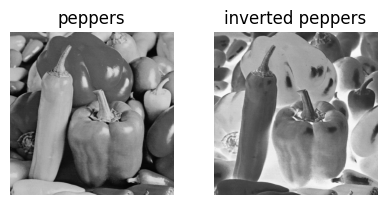

In [57]:
peppers = cv2.imread("../data/hw4/peppers_gray.tif")
p4_images = [peppers, get_negative(peppers)]
p4_titles = ["peppers", "inverted peppers"]
plot_images(p4_images, p4_titles)

<b>Follow-up Question:</b> The negative of a grayscale image is the inverse of the image. In other words, for each pixel, the new value will be the original value subtracted from 255.

# Project 5: Logical Operations on Images

In [146]:
barcode = cv2.imread("../data/hw4/Barcode.png")
dims = barcode.shape
rnd_img = np.random.choice([0, 1], size=(512, 512))
rnd_img = np.stack([rnd_img] * 3, axis=-1)
rnd_img = (rnd_img * 255).astype("uint8")

print(f"barcode shape {dims} type {barcode.dtype}, rnd_img shape {rnd_img.shape} type {rnd_img.dtype}")

barcode shape (512, 512, 3) type uint8, rnd_img shape (512, 512, 3) type uint8


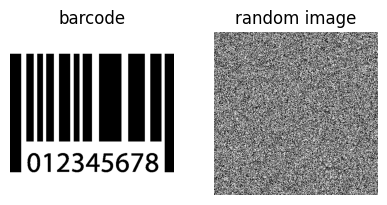

In [148]:
plot_images([barcode, rnd_img], ["barcode", "random image"])

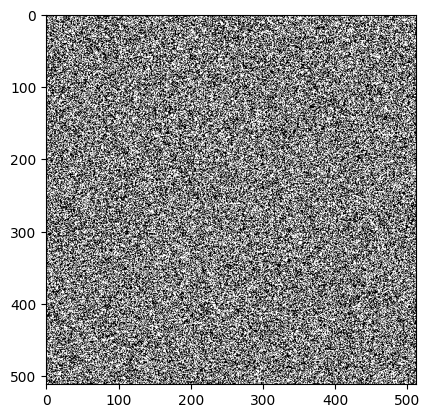

In [135]:
plt.imshow(rnd_img, cmap="gray")

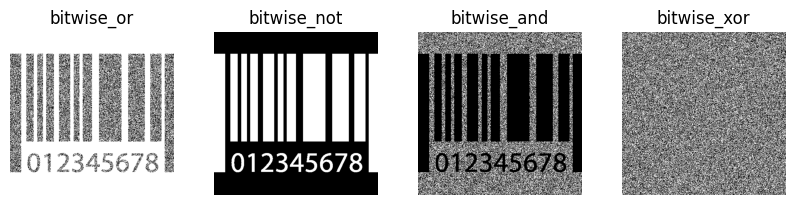

In [147]:
p5_images = []
p5_titles = ["bitwise_or", "bitwise_not", "bitwise_and", "bitwise_xor"]

# bitwise_or
p5_or = cv2.bitwise_or(barcode, rnd_img)

# bitwise_not
p5_not = cv2.bitwise_not(barcode)

# bitwise_and
p5_and = cv2.bitwise_and(barcode, rnd_img)

# bitwise_xor
p5_xor = cv2.bitwise_xor(barcode, rnd_img)

# Plot results
p5_images = [p5_or, p5_not, p5_and, p5_xor]
plot_images(p5_images, p5_titles)